In [10]:
# 17 April 2024
# CSC354 – Assignmen3 – ML – Support Vector Machines
# MUHAMMAD MIKAAL AMJAD
# FA21-BSE-143
# Task was to implement svm on a data set, and identify the outliers if any and assess data
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Reading csv File and giving the headers to each column, first column with x second y and third is the result
heads=['x','y','Result']
data=pd.read_csv("/content/dataset-q-1.csv",names=heads)
print(data)

           x         y  Result
0   0.305057  1.852707      -1
1   0.350855  0.547624      -1
2   2.383367  4.424116      -1
3   3.055610  0.159656      -1
4   3.089258  3.970069      -1
5   3.362482  4.038429      -1
6   0.522078  6.644703       1
7   4.277754  1.951025      -1
8   4.292037  8.452302       1
9   4.390061  2.650962      -1
10  4.391739  4.388713      -1
11  4.617555  4.282322      -1
12  5.686953  7.541989       1
13  5.736236  7.109202       1
14  3.833368  0.640896      -1
15  7.074342  7.744356       1
16  7.749716  9.969612       1
17  8.174119  6.224119       1
18  8.357997  8.208005       1
19  2.723342  0.568875      -1
20  8.767977  9.747111       1
21  9.016805  8.238261       1
22  9.169709  9.788275       1
23  9.672429  8.775718       1
24  9.969026  5.876345       1


I basically fetched the dataset from the dataset-q1.csv, the data is unlabeled in the csv file so I named the first column to be x second to be y and third to be the result

In [5]:
#Seperating the different classes data and taking 1 as positively classified data
positive=data[data['Result']==1]
negative=data[data['Result']==-1]
print(positive)

           x         y  Result
6   0.522078  6.644703       1
8   4.292037  8.452302       1
12  5.686953  7.541989       1
13  5.736236  7.109202       1
15  7.074342  7.744356       1
16  7.749716  9.969612       1
17  8.174119  6.224119       1
18  8.357997  8.208005       1
20  8.767977  9.747111       1
21  9.016805  8.238261       1
22  9.169709  9.788275       1
23  9.672429  8.775718       1
24  9.969026  5.876345       1


Using this code, I seperated the positive and Negative Classification

In [6]:
import matplotlib.pyplot as plt #for plotting the points as scatter plot


Used to plot the graph

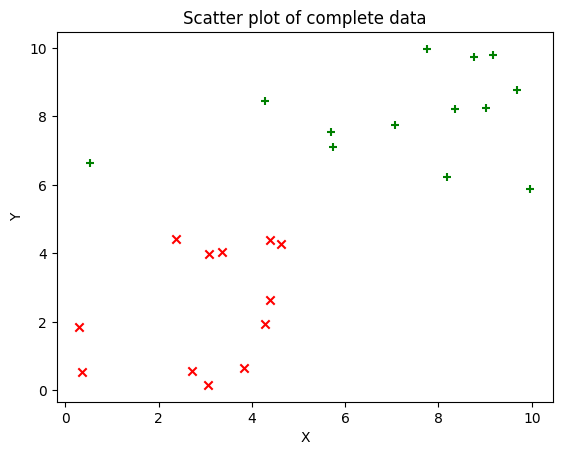

In [24]:
plt.scatter(positive['x'],positive['y'],color="Green", marker='+')
plt.scatter(negative['x'], negative['y'],color="Red", marker='x')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of complete data")
plt.show()


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data[['x', 'y']], data['Result'], test_size=0.2, random_state=42)

# Create and train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [15]:
# Get the coefficients of the hyperplane
coefficients = svm.coef_[0]

# Get the intercept of the hyperplane
intercept = svm.intercept_[0]

# Print the hyperplane equation
print("Hyperplane equation:")
print(f"{coefficients[0]} * y + {coefficients[1]} * x + ({intercept}) = 0")


Hyperplane equation:
0.08387115925890365 * y + 1.0299794242898819 * x + (-5.888315098024791) = 0


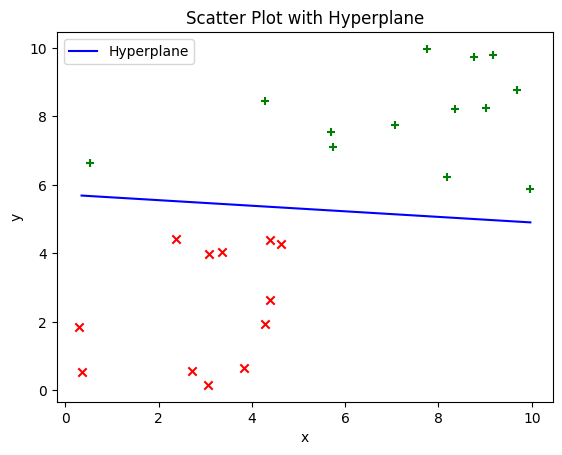

In [23]:
import numpy as np
# Define a function to calculate y-values for a given x
def hyperplane(x):
    return (-intercept - coefficients[0] * x) / coefficients[1]

# Plot the hyperplane
x_values = np.linspace(min(X_train['x']), max(X_train['x']), 100)  # Define x range
plt.plot(x_values, hyperplane(x_values), color='blue', label='Hyperplane')
plt.scatter(positive['x'],positive['y'],color="Green", marker='+')
plt.scatter(negative['x'], negative['y'],color="Red", marker='x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Hyperplane')
plt.legend()

In [21]:
support_vectors = svm.support_vectors_
print(support_vectors)

[[4.391739 4.388713]
 [9.969026 5.876345]
 [0.522078 6.644703]]
